# **DIABETES PREDICTION MODEL**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay , accuracy_score , precision_score , recall_score , f1_score

In [ ]:
data = pd.read_csv("diabetes.csv")
print(data.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [ ]:
data.shape

(768, 9)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
data = data.rename(columns={'DiabetesPedigreeFunction':'DiabetesPedigree' })

In [ ]:
data.isnull().sum()

Pregnancies         0
Glucose             0
BloodPressure       0
SkinThickness       0
Insulin             0
BMI                 0
DiabetesPedigree    0
Age                 0
Outcome             0
dtype: int64

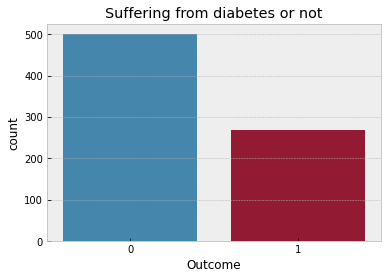

In [ ]:

plt.style.use('bmh')
ax = sns.countplot(x= data.Outcome , data= data)
ax.set_title('Suffering from diabetes or not')
plt.show()

In [ ]:
np.sort(data.Age.unique())

array([21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
       38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54,
       55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 72,
       81])

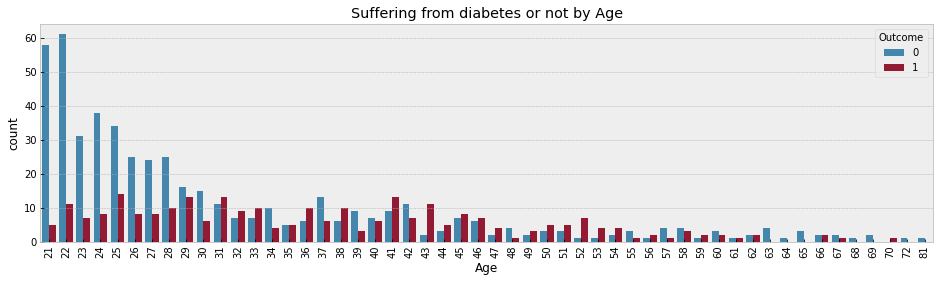

In [ ]:
plt.figure(figsize=(16,4))
plt.xticks(rotation = 90)
ax = sns.countplot(x= data.Age , hue= data.Outcome)
ax.set_title('Suffering from diabetes or not by Age')
plt.show()

In [ ]:
np.sort(data.BloodPressure.unique())

array([  0,  24,  30,  38,  40,  44,  46,  48,  50,  52,  54,  55,  56,
        58,  60,  61,  62,  64,  65,  66,  68,  70,  72,  74,  75,  76,
        78,  80,  82,  84,  85,  86,  88,  90,  92,  94,  95,  96,  98,
       100, 102, 104, 106, 108, 110, 114, 122])

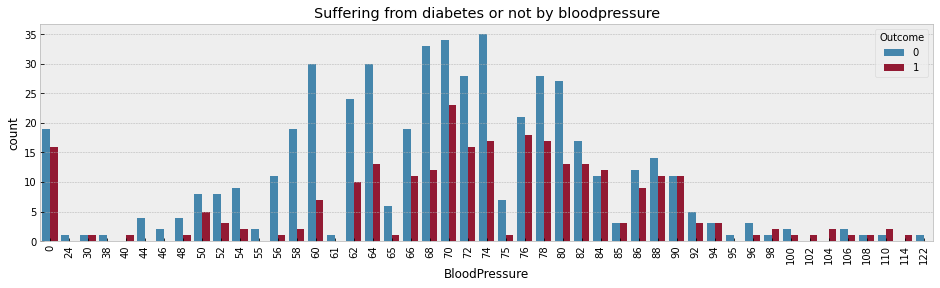

In [ ]:
plt.figure(figsize=(16,4))
plt.xticks(rotation = 90)
ax = sns.countplot(x= data.BloodPressure , hue= data.Outcome)
ax.set_title('Suffering from diabetes or not by bloodpressure')
plt.show()

In [ ]:
np.sort(data.Insulin.unique())

In [ ]:
X= data.drop(['Outcome'] , axis=1)
y= data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)

accuracy_train:  76.38 %
accuracy_test:  75.97 %
precision_score:  0.82
recall_score:  0.47
f1_score:  0.59


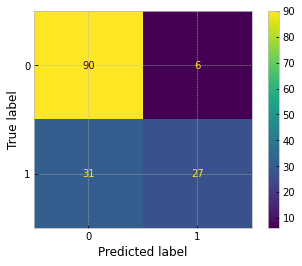

In [ ]:
from sklearn.svm import SVC
clf = svm.SVC().fit(X_train, y_train)
acc_train = clf.score(X_train, y_train)
y_pred = clf.predict(X_test)
acc_test = accuracy_score(y_pred , y_test)
print('accuracy_train: ',round(acc_train*100,2),'%')
print('accuracy_test: ', round(acc_test*100,2),'%')
print('precision_score: ', round(precision_score(y_test, y_pred),2))
print('recall_score: ', round(recall_score(y_test, y_pred),2))
print('f1_score: ', round(f1_score(y_test, y_pred),2))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
#splitting dataset into 80:20 ratio
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.2)

In [ ]:
train_X.shape,test_X.shape,train_y.shape,test_y.shape

((614, 14), (154, 14), (614,), (154,))

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,make_scorer
from sklearn.model_selection import cross_validate

In [ ]:
def tn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 0]
def fp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 1]
def fn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 0]
def tp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 1]

#cross validation purpose
scoring = {'accuracy': make_scorer(accuracy_score),'prec': 'precision'}
scoring = {'tp': make_scorer(tp), 'tn': make_scorer(tn),
           'fp': make_scorer(fp), 'fn': make_scorer(fn)}

def display_result(result):
    print("TP: ",result['test_tp'])
    print("TN: ",result['test_tn'])
    print("FN: ",result['test_fn'])
    print("FP: ",result['test_fp'])

In [ ]:
#logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

#random forest

from sklearn.ensemble import RandomForestClassifier as rc
rfc= rc(n_estimators=200)
rfc.fit(train_X,train_y)

#accuracy test for rfc

rfc_train=rfc.predict(train_X)
from sklearn import metrics as m
predictions = rfc.predict(X_test)
print("accuracy score= ", format(m.accuracy_score(y_test, predictions )))

accuracy score=  0.922077922077922


In [ ]:
# svm model

from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(X_train, y_train)
svc_pred = svc_model.predict(X_test)


print("Accuracy Score =", format(m.accuracy_score(y_test, svc_pred)))

Accuracy Score = 0.7597402597402597


Accuracy: 0.7597402597402597


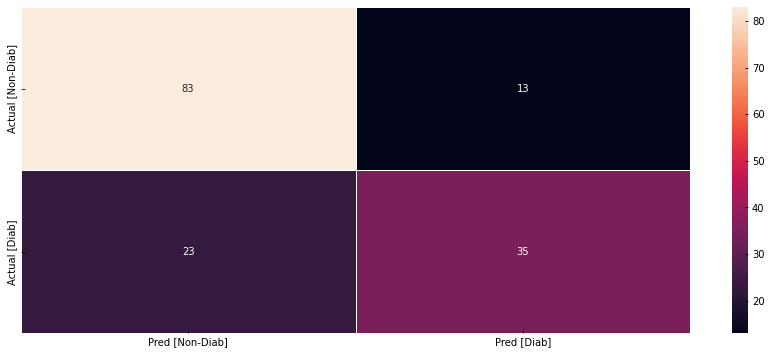

In [ ]:
#NAIES BAYES
from sklearn.naive_bayes import GaussianNB
nbModel = GaussianNB()
nbModel.fit(X_train, y_train)

nb_y_pred = nbModel.predict(X_test)
nbConfusion = m.confusion_matrix(y_test, nb_y_pred)
nbConfusion
ylabel = ["Actual [Non-Diab]","Actual [Diab]"]
xlabel = ["Pred [Non-Diab]","Pred [Diab]"]
#sns.set(font_scale = 1.5)
plt.figure(figsize=(15,6))
sns.heatmap(nbConfusion, annot=True, xticklabels = xlabel, yticklabels = ylabel, linecolor='white', linewidths=1)
print("Accuracy:", accuracy_score(y_test, y_pred))

In [ ]:
print('Accuracy of Naive Bayes Classifier is: ', nbModel.score(X_test,y_test) * 100,'%')


Accuracy of Naive Bayes Classifier is:  76.62337662337663 %


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
def knn(X_train, y_train, X_test, y_test,n):
    n_range = range(1, n)
    results = []
    for n in n_range:
        knn = KNeighborsClassifier(n_neighbors=n)
        knn.fit(X_train, y_train)
        #Predict the response for test dataset
        predict_y = knn.predict(X_test)
        accuracy = m.accuracy_score(y_test, predict_y)
        #matrix = confusion_matrix(y_test,predict_y)
        #seaborn_matrix = sns.heatmap(matrix, annot = True, cmap="Blues",cbar=True)
        results.append(accuracy)
    return results

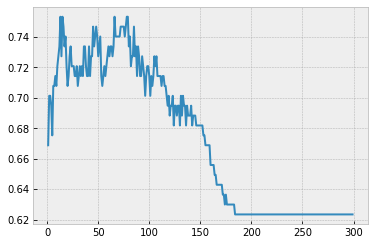

In [ ]:
n= 300
output = knn(X_train,y_train,X_test,y_test,n)
n_range = range(1, n)
plt.plot(n_range, output)

In [ ]:
#logistic regression has highest accuracy 92%
#model can be improve more if we take same count of labels
#in our model 35% is diabetic and 65% no diabetic patient

#model can be improve with fine tunning